In [5]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display

## Filter data

In [6]:
def filter_data(data_sent):
    data = data_sent.copy()
    max_flux = -12
    min_flux = 26
    data = data[data['flux_aper']<max_flux]

    data = data[data['significance']>2]
    data_class = data[['class']]

    data_sig = data['significance']
    data_id = data['src_id']
    data_name = data['src_n']
    obs_info_params = [ 'livetime','likelihood','pileup_flag','mstr_sat_src_flag','mstr_streak_src_flag'   ,'gti_obs' , 'flux_significance_b'  , 'flux_significance_m' , 'flux_significance_s' , 'flux_significance_h' , 'flux_significance_u'    ]
    data_val = data.drop(columns=obs_info_params).reset_index(drop=True)
    return data_val

def norm_data(data_sent):
    data = data_sent.copy()
    #data.replace()
    for d in data:
        max_val = np.amax(data[d])
        min_val =  np.amin(data[d])
        data[d] = (data[d]-min_val)/(max_val-min_val)
    return data
def std_data(data_sent):
    data = data_sent.copy()
    for d in data:
        mean =  np.mean(data[d])
        std = np.sqrt(np.var(data[d]))
        data[d] = (data[d]-mean)/std 
    return data
def do_nothing(data_sent):
    return data_sent

In [8]:
def extract_data(data_sent , impute_fn = '',reduce_fn = ' ' , rf_impute=False):
    data = data_sent.copy()
    data = data.sample(frac=1)
    data = filter_data(data)
    #display(data)
    data_id = data[['obs_id' ,'class' ,'src_n' , 'src_id' ,'significance' , ]]
    data_id = data_id.reset_index(drop=True)
    data_val = data.drop(['index' , 'class' ,'src_n' , 'src_id' ,'significance' , 'obs_id'] , axis=1)
    data_val = reduce_fn(data_val)
    return data_val , data_id
    #if(rf_impute):
    #    data_val  , random_forest_imputer = impute_fn(data_val , data_id)
    #else:
    #    data_val = impute_fn(data_val)
    data_val = reduce_fn(data_val)
    data_val = data_val.reset_index(drop=True)
    data_reduced = pd.concat([data_id , data_val] , axis=1)
    if(rf_impute):
        return(data_reduced , random_forest_imputer)
    else:
        return data_reduced

## Load data

In [9]:

train_bh = pd.read_csv('../processed_data/BH_.csv')
train_bh = train_bh.sample(frac=1)

train_ns = pd.read_csv('../processed_data/NS_.csv' )
train_ns = train_ns.sample(frac=1)

train = pd.concat([train_bh , train_ns ] , axis=0)
train =  train.sample(frac=1).reset_index(drop=True)


# RF imputer

In [10]:
from MissingValuesHandler.missing_data_handler import RandomForestImputer

In [19]:
def rf_impute(d, i ):
    data = pd.concat([i , d] , axis=1)
    data = data.drop(columns=['src_n' , 'src_id' , 'significance' , 'obs_id'])
    rf_imputer = RandomForestImputer(
        data=data , 
        target_variable_name='class' , 
        forbidden_features_list=[] , 
        
    )
    rf_imputer.set_ensemble_model_parameters(n_estimators=400 , additional_estimators=100)
    new_data =  rf_imputer.train(sample_size = 0, path_to_save_dataset='processed_data/rf_imp.csv')
    new_data = new_data.drop(columns= ['class'])
    return new_data , rf_imputer

In [20]:
data_val , data_id   = extract_data(train ,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )


In [21]:
new_data , random_forest_imputer = rf_impute(data_val, data_id)
#train_data.index.name = 'index'
#display(train_data.describe())
#train_data.to_csv('../processed_data/train_norm_rf_impute')



- 16082 VALUE(S) CONVERGED!
- 3480 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 16360 VALUE(S) CONVERGED!
- 3202 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 16775 VALUE(S) CONVERGED!
- 2787 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 17755 VALUE(S) CONVERGED!
- 1807 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 18442 VALUE(S) CONVERGED!
- 1120 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19168 VALUE(S) CONVERGED!
- 394 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19236 VALUE(S) CONVERGED!
- 326 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19257 VALUE(S) CONVERGED!
- 305 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19296 VALUE(S) CONVERGED!
- 266 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19306 VALUE(S) CONVERGED!
- 256 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19346 VALUE(S) CONVERGED!
- 216 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19378 VALUE(S) CONVERGED!
- 184 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19384 VALUE(S) CONVERGED!
- 178 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19394 VALUE(S) CONVERGED!
- 168 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19407 VALUE(S) CONVERGED!
- 155 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19409 VALUE(S) CONVERGED!
- 153 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19415 VALUE(S) CONVERGED!
- 147 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19425 VALUE(S) CONVERGED!
- 137 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19437 VALUE(S) CONVERGED!
- 125 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19439 VALUE(S) CONVERGED!
- 123 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19439 VALUE(S) CONVERGED!
- 123 VALUE(S) REMAINING!
- 123/19562 VALUES UNABLE TO CONVERGE. THE MEDIAN AND/OR THE MODE HAVE BEEN USED AS A REPLACEMENT

- TOTAL ITERATIONS: 105

- NEW DATASET SAVED in: processed_data/rf_imp.csv


In [22]:
train

,index,class,obs_id,src_n,src_id,livetime,significance,likelihood,pileup_flag,mstr_sat_src_flag,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,324,NS,NS_OBS_324,XTE J1739-285,NS0051,14603.0,4.38,66.9795,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,408,NS,NS_OBS_408,SAXWFC J1748.1-2446.,NS0072,49201.9,19.47,1856.4730,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89,NS,NS_OBS_89,EXO 1745-248,NS0020,34063.0,23.47,1934.9200,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123,BH,BH_OBS_123,J1047+1234,BH0024,83110.1,56.53,18798.2700,False,False,...,0.000210,0.000250,3.123,3.615,4.1490,3.1720,1.786,3.55,0.08326,0.878
4,88,NS,NS_OBS_88,EXO 1745-248,NS0020,9844.9,23.47,1934.9200,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,267,NS,NS_OBS_267,XMMU J004245.2+41172,NS0046,3817.9,4.71,162.7296,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,74,NS,NS_OBS_74,3A 2129+470,NS0011,20832.6,41.03,11815.2300,False,False,...,0.003722,0.012980,0.932,0.370,0.4221,0.3231,33.480,40.61,27.18000,0.835
636,122,BH,BH_OBS_122,J1047+1234,BH0024,69066.2,56.53,18798.2700,False,False,...,0.000113,0.000134,3.190,5.361,6.2860,4.6190,5.415,7.23,3.69400,1.062
637,169,BH,BH_OBS_169,J1745-2900,BH0027,17830.2,337.00,462011.4000,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_id

,obs_id,class,src_n,src_id,significance
0,NS_OBS_285,NS,XMMU J004245.2+41172,NS0046,4.71
1,BH_OBS_159,BH,J1745-2900,BH0027,337.00
2,NS_OBS_239,NS,XMMU J004245.2+41172,NS0044,49.26
3,NS_OBS_430,NS,1WGA J1911.2+0035,NS0078,44.36
4,NS_OBS_128,NS,H 1658-298,NS0024,31.12
...,...,...,...,...,...
455,NS_OBS_79,NS,EXO 0748-676,NS0019,62.80
456,BH_OBS_96,BH,CXOU J100516.5-07420,BH0021,16.75
457,NS_OBS_419,NS,1WGA J0748.5-6745,NS0076,6.77
458,NS_OBS_170,NS,XMMU J004245.2+41172,NS0044,49.26


In [39]:
sample_used                         = random_forest_imputer.get_sample()
features_type_prediction            = random_forest_imputer.get_features_type_predictions()
target_variable_type_prediction     = random_forest_imputer.get_target_variable_type_prediction()
encoded_features                    = random_forest_imputer.get_encoded_features()
encoded_target_variable             = random_forest_imputer.get_target_variable_encoded()
final_proximity_matrix              = random_forest_imputer.get_proximity_matrix()
final_distance_matrix               = random_forest_imputer.get_distance_matrix()
weighted_averages                   = random_forest_imputer.get_nan_features_predictions(option="all")
convergent_values                   = random_forest_imputer.get_nan_features_predictions(option="conv")
divergent_values                    = random_forest_imputer.get_nan_features_predictions(option="div")
ensemble_model_parameters           = random_forest_imputer.get_ensemble_model_parameters()
all_target_value_predictions        = random_forest_imputer.get_nan_target_values_predictions(option="all")
target_value_predictions            = random_forest_imputer.get_nan_target_values_predictions(option="one")


In [25]:
encoded_features_norm = norm_data(encoded_features)
encoded_features_norm

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,0.388560,0.497284,0.380068,0.508516,0.495726,0.689134,0.558162,0.644405,0.412691,0.389502,...,0.000000,0.000000,0.080430,0.026867,0.046448,0.021107,0.044158,0.047536,0.041247,0.067344
1,0.393884,0.540884,0.370627,0.639102,0.630347,0.689134,0.558162,0.448130,0.598518,0.578761,...,0.000000,0.000000,0.080430,0.066996,0.046448,0.021107,0.141304,0.151548,0.127484,0.067344
2,0.516051,0.252144,0.503096,0.489923,0.529836,0.589120,0.558162,0.554232,0.528624,0.573179,...,0.000000,0.000000,0.080430,0.026867,0.046448,0.021107,0.042799,0.048121,0.040522,0.067344
3,0.936744,0.448779,0.926310,0.834697,0.912403,0.947744,0.464130,0.935261,0.845467,0.921660,...,0.369222,0.510578,0.216658,0.003970,0.012100,0.004518,0.033478,0.030737,0.032978,0.149243
4,0.582890,0.234397,0.517369,0.191409,0.500204,0.652359,0.137770,0.565829,0.550558,0.547897,...,0.000000,0.000000,0.080430,0.026867,0.046448,0.021107,0.046196,0.049874,0.042696,0.067344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.987476,0.752587,0.871005,0.705780,0.880134,0.993440,0.850997,0.892844,0.741232,0.896913,...,0.388463,0.332491,0.146707,0.003720,0.010279,0.004635,0.009735,0.008754,0.009418,0.060298
456,0.340083,0.138241,0.273939,0.302382,0.335319,0.447408,0.558162,0.347078,0.345686,0.395012,...,0.000000,0.000000,0.080430,0.066996,0.046448,0.021107,0.148777,0.159144,0.135455,0.067344
457,0.597466,0.645953,0.380789,0.700067,0.253967,0.689134,0.558162,0.397894,0.550558,0.235187,...,0.000000,0.000000,0.080430,0.026867,0.046448,0.021107,0.044158,0.048121,0.041971,0.067344
458,0.471104,0.559202,0.531328,0.545294,0.550935,0.281834,0.558162,0.488777,0.487622,0.531638,...,0.000000,0.000000,0.080430,0.026867,0.046448,0.021107,0.044158,0.047536,0.041247,0.067344


In [26]:
processed_data_all = pd.concat([data_id , encoded_features] , axis=1)
processed_data_all.to_csv('../processed_data/train_none_rf_impute')

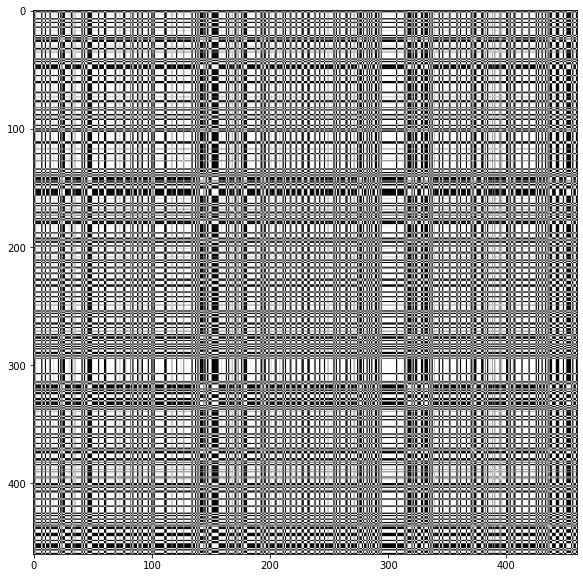

In [27]:
plt.figure(figsize=(12,10))
plt.imshow(
    final_proximity_matrix , 
    cmap='gray'
)
plt.show()

-(30, 'powlaw_nh') graph created
-(61, 'powlaw_nh') graph created
-(70, 'powlaw_nh') graph created
-(94, 'powlaw_nh') graph created
-(127, 'powlaw_nh') graph created
-(147, 'powlaw_nh') graph created
-(161, 'powlaw_nh') graph created
-(286, 'powlaw_nh') graph created
-(305, 'powlaw_nh') graph created
-(327, 'powlaw_nh') graph created
-(339, 'powlaw_nh') graph created
-(347, 'powlaw_nh') graph created
-(349, 'powlaw_nh') graph created
-(353, 'powlaw_nh') graph created
-(383, 'powlaw_nh') graph created
-(384, 'powlaw_nh') graph created
-(385, 'powlaw_nh') graph created
-(388, 'powlaw_nh') graph created
-(399, 'powlaw_nh') graph created
-(433, 'powlaw_nh') graph created
-(16, 'powlaw_nh_hilim') graph created
-(19, 'powlaw_nh_hilim') graph created
-(27, 'powlaw_nh_hilim') graph created
-(30, 'powlaw_nh_hilim') graph created
-(61, 'powlaw_nh_hilim') graph created
-(70, 'powlaw_nh_hilim') graph created
-(94, 'powlaw_nh_hilim') graph created
-(127, 'powlaw_nh_hilim') graph created
-(141, 'pow

KeyboardInterrupt: 

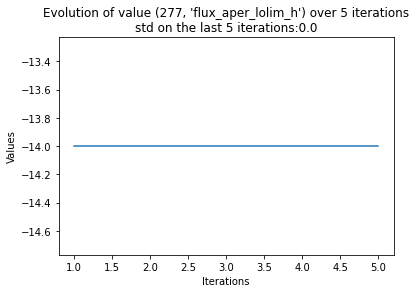

In [44]:
random_forest_imputer.create_weighted_averages_plots(directory_path="graphs", both_graphs=1)


In [155]:
random_forest_imputer.create_target_pred_plot(directory_path="target_graphs")

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns 

In [62]:
np.random.seed(9)
for i in range(20):
    rs = int(np.random.uniform(0 , 987273352))
    np.random.seed(rs)
    print('RANDOM NO ' , rs)
    print('-------------------------------------')
    mds_coordinates = random_forest_imputer.get_mds_coordinates(n_dimensions=3, distance_matrix=final_distance_matrix)

    #random_forest_imputer.show_mds_plot(mds_coordinates, plot_type="3d")
    #mds_coordinates = random_forest_imputer.get_mds_coordinates(n_dimensions=3, distance_matrix=final_distance_matrix)

    col = ['c'+str(i) for i in range(mds_coordinates.shape[1])]
    print(col)
    mds_df = pd.DataFrame(mds_coordinates , columns =col)
    mds_df.insert(0 , 'class' , data_id['class'])
    mds_df.index.name = 'index'
    #display(mds_df)
    #mds_df.to_csv('result/rf_clustering.csv')

    #df= pd.read_csv('result/rf_clustering.csv' , index_col=0)
    #df.to_csv('../processed_data/rf_clustered_3d.csv')
    #display(df)
    df = mds_df.copy()
    #plt.figure(figsize=(6,6))
    '''
    sns.pairplot(
        data = df , 
        #x = 'c1' , 
        hue= 'class' ,
        palette='mako' ,
        height= 2 , aspect=8/6    , 
        kind='scatter'  , 
        plot_kws = {'alpha': 0.5}
    )
    '''
    #plt.show()
    train_acc = []
    test_acc = []
    clf = RandomForestClassifier(n_estimators=400 , criterion='entropy' , random_state=2)
    for i in range(6):
        df = df.sample(frac=1)
        x = df.drop(['class'] , axis=1)
        y = df['class']
        x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True , random_state=2)
        clf.fit(x_train , y_train)
        tr = clf.score(x_train , y_train)
        tst = clf.score(x_test , y_test)
        #print('\n -----------------')
        print(tr , tst)
        train_acc.append(tr)
        test_acc.append(tst)
        

RANDOM NO  10242125
-------------------------------------
['c0', 'c1', 'c2']
1.0 0.9239130434782609
1.0 0.9565217391304348
1.0 0.9565217391304348
1.0 0.9456521739130435
1.0 0.9239130434782609
1.0 0.9021739130434783
RANDOM NO  951435156
-------------------------------------
['c0', 'c1', 'c2']
1.0 0.9782608695652174
1.0 0.8804347826086957
1.0 0.9456521739130435
1.0 0.9347826086956522
1.0 0.9239130434782609
1.0 0.9239130434782609
RANDOM NO  197755942
-------------------------------------
['c0', 'c1', 'c2']
1.0 0.9782608695652174
1.0 0.9130434782608695
1.0 0.9456521739130435
1.0 0.9565217391304348
1.0 0.967391304347826
1.0 0.967391304347826
RANDOM NO  577187141
-------------------------------------
['c0', 'c1', 'c2']
1.0 0.9456521739130435
1.0 0.9347826086956522
1.0 0.9456521739130435
1.0 0.9239130434782609
1.0 0.9130434782608695
1.0 0.9130434782608695
RANDOM NO  420547361
-------------------------------------
['c0', 'c1', 'c2']
1.0 0.9239130434782609
1.0 0.9021739130434783
1.0 0.945652173

In [86]:
GOOD_RN = 197755942
np.random.seed(GOOD_RN)
print('RANDOM NO ' , rs)
print('-------------------------------------')
mds_coordinates = random_forest_imputer.get_mds_coordinates(n_dimensions=3, distance_matrix=final_distance_matrix)

#random_forest_imputer.show_mds_plot(mds_coordinates, plot_type="3d")
#mds_coordinates = random_forest_imputer.get_mds_coordinates(n_dimensions=3, distance_matrix=final_distance_matrix)

col = ['c'+str(i) for i in range(mds_coordinates.shape[1])]
print(col)
mds_df = pd.DataFrame(mds_coordinates , columns =col)
mds_df.insert(0 , 'class' , data_id['class'])
mds_df.index.name = 'index'
#display(mds_df)
mds_df.to_csv('result/rf_clustering.csv')

df= pd.read_csv('result/rf_clustering.csv' , index_col=0)
#df.to_csv('../processed_data/rf_clustered_3d.csv')
#display(df)
df = mds_df.copy()
#plt.figure(figsize=(6,6))
'''
sns.pairplot(
    data = df , 
    #x = 'c1' , 
    hue= 'class' ,
    palette='mako' ,
    height= 2 , aspect=8/6    , 
    kind='scatter'  , 
    plot_kws = {'alpha': 0.5}
)
'''
#plt.show()
train_acc = []
test_acc = []
#for i in range(18):
#    rs = int(np.random.uniform(0,9999999))
rs = 7123642
np.random.seed(rs)
clf = RandomForestClassifier(n_estimators=400 , criterion='entropy' , random_state=2)
#df = df.sample(frac=1)
x = df.drop(['class'] , axis=1)
y = df['class']
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True , random_state=2)
clf.fit(x_train , y_train)
tr = clf.score(x_train , y_train)
tst = clf.score(x_test , y_test)
#print('\n -----------------')
print(rs , tst)
train_acc.append(tr)
test_acc.append(tst)

RANDOM NO  7123642
-------------------------------------
['c0', 'c1', 'c2']
7123642 0.9347826086956522


In [87]:
data_id

,obs_id,class,src_n,src_id,significance
0,NS_OBS_285,NS,XMMU J004245.2+41172,NS0046,4.71
1,BH_OBS_159,BH,J1745-2900,BH0027,337.00
2,NS_OBS_239,NS,XMMU J004245.2+41172,NS0044,49.26
3,NS_OBS_430,NS,1WGA J1911.2+0035,NS0078,44.36
4,NS_OBS_128,NS,H 1658-298,NS0024,31.12
...,...,...,...,...,...
455,NS_OBS_79,NS,EXO 0748-676,NS0019,62.80
456,BH_OBS_96,BH,CXOU J100516.5-07420,BH0021,16.75
457,NS_OBS_419,NS,1WGA J0748.5-6745,NS0076,6.77
458,NS_OBS_170,NS,XMMU J004245.2+41172,NS0044,49.26


In [88]:
df

,class,c0,c1,c2
index,,,,
0,NS,0.236949,0.140368,-0.162519
1,BH,-0.443973,-0.309915,0.326120
2,NS,0.215927,0.155337,-0.148353
3,NS,0.183507,0.153374,-0.130772
4,NS,0.217804,0.091383,-0.167727
...,...,...,...,...
455,NS,0.225645,0.081193,-0.134441
456,BH,-0.501044,-0.295349,0.337826
457,NS,0.223751,0.148751,-0.162723


In [93]:
data_3d_all = pd.concat([data_id , df.drop('class' , axis=1)] , axis=1)
data_3d_all.to_csv('../processed_data/rf_clustered_3d.csv')

# Classification Score

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [177]:
acc_df = pd.DataFrame()
dim = [1 ,2 ,3 , 4 , 8 , 15 , 25 , 40 , 60 , 90]
for d in dim:
    mds_coordinates = random_forest_imputer.get_mds_coordinates(n_dimensions=d, distance_matrix=final_distance_matrix)
    col = ['c'+str(i) for i in range(mds_coordinates.shape[1])]
    print(col)
    mds_df = pd.DataFrame(mds_coordinates , columns =col)
    mds_df.insert(0 , 'class' , data_id['class'])
    mds_df.index.name = 'index'
    mds_df.to_csv('result/rf_clustering.csv')
    df= pd.read_csv('result/rf_clustering.csv' , index_col=0)
    #df =  df.sample(frac=1)
    train_acc = []
    test_acc = []
    clf = RandomForestClassifier(n_estimators=300 , criterion='entropy' , random_state=2)
    temp_df = pd.DataFrame()
    for i in range(32):
        df = df.sample(frac=1)
        x = df.drop(['class'] , axis=1)
        y = df['class']
        x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True , random_state=2 , stratify=y)
        clf.fit(x_train , y_train)
        tr = clf.score(x_train , y_train)
        tst = clf.score(x_test , y_test)
        print('\n -----------------')
        print(tr , tst)
        train_acc.append(tr)
        test_acc.append(tst)
    temp_df.insert( 0 ,'dim' , [str(d)]*len(train_acc))
    temp_df.insert(1 , 'train_acc' , train_acc)
    temp_df.insert(2 , 'test_acc' , test_acc)
    acc_df = acc_df.append(temp_df)



['c0']

 -----------------
1.0 0.9239130434782609

 -----------------
0.9972826086956522 0.8695652173913043

 -----------------
1.0 0.9130434782608695

 -----------------
0.9972826086956522 0.9021739130434783

 -----------------
0.9972826086956522 0.8695652173913043

 -----------------
0.9972826086956522 0.9130434782608695

 -----------------
0.9972826086956522 0.9239130434782609

 -----------------
0.9972826086956522 0.8586956521739131

 -----------------
0.9972826086956522 0.9021739130434783

 -----------------
0.9972826086956522 0.9456521739130435

 -----------------
0.9972826086956522 0.9130434782608695

 -----------------
0.9972826086956522 0.8586956521739131

 -----------------
0.9972826086956522 0.8913043478260869

 -----------------
0.9972826086956522 0.8586956521739131

 -----------------
1.0 0.9021739130434783

 -----------------
0.9972826086956522 0.9239130434782609

 -----------------
1.0 0.9347826086956522

 -----------------
0.9972826086956522 0.8478260869565217

 -------

In [178]:
acc_df = acc_df.reset_index(drop=True)
acc_df

,dim,train_acc,test_acc
0,1,1.000000,0.923913
1,1,0.997283,0.869565
2,1,1.000000,0.913043
3,1,0.997283,0.902174
4,1,0.997283,0.869565
...,...,...,...
315,90,1.000000,0.934783
316,90,1.000000,0.934783
317,90,1.000000,0.934783
318,90,1.000000,0.956522


In [179]:
import seaborn as sns

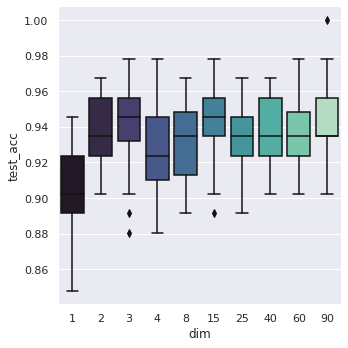

In [183]:
sns.catplot(
    data = acc_df , 
    y = 'test_acc' ,
    x = 'dim' , 
    palette='mako' , 
    kind='box'
)
plt.show()

In [185]:
data = pd.read_csv('processed_data/rf_imp.csv')
data.to_csv()

In [20]:

train_acc = []
test_acc = []
clf = RandomForestClassifier(n_estimators=300 , criterion='entropy' , random_state=2)
temp_df = pd.DataFrame()
for i in range(32):
    df = data.sample(frac=1)
    x = df.drop(['class'] , axis=1)
    y = df['class']
    x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True , random_state=2 , stratify=y)
    clf.fit(x_train , y_train)
    tr = clf.score(x_train , y_train)
    tst = clf.score(x_test , y_test)
    print('\n -----------------')
    print(tr , tst)
    train_acc.append(tr)
    test_acc.append(tst)


NameError: name 'data' is not defined

<AxesSubplot:>

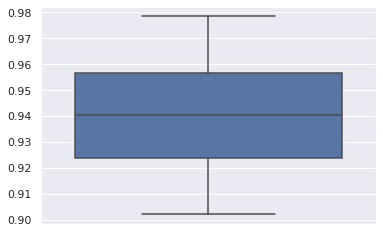

In [187]:
sns.boxplot(y = test_acc)

In [194]:
np.random.seed(348)
df = data.sample(frac=1)
x = df.drop(['class'] , axis=1)
y = df['class']
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True , random_state=2 , stratify=y)
clf.fit(x_train , y_train)
tr = clf.score(x_train , y_train)
tst = clf.score(x_test , y_test)
print(tr , tst)

1.0 0.9456521739130435


In [197]:
prob = clf.predict_proba(x_test)

array([[0.00666667, 0.99333333],
       [0.96666667, 0.03333333],
       [0.        , 1.        ],
       [0.00666667, 0.99333333],
       [0.26333333, 0.73666667],
       [0.65666667, 0.34333333],
       [0.89666667, 0.10333333],
       [0.05666667, 0.94333333],
       [0.00333333, 0.99666667],
       [0.93666667, 0.06333333],
       [0.00666667, 0.99333333],
       [0.01666667, 0.98333333],
       [0.04333333, 0.95666667],
       [0.97333333, 0.02666667],
       [0.88666667, 0.11333333],
       [0.01666667, 0.98333333],
       [0.02      , 0.98      ],
       [0.04      , 0.96      ],
       [0.05333333, 0.94666667],
       [0.61333333, 0.38666667],
       [0.34333333, 0.65666667],
       [0.88      , 0.12      ],
       [0.62      , 0.38      ],
       [0.09333333, 0.90666667],
       [0.76666667, 0.23333333],
       [0.61333333, 0.38666667],
       [0.        , 1.        ],
       [0.03      , 0.97      ],
       [0.96333333, 0.03666667],
       [0.02666667, 0.97333333],
       [0.